In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.metrics import classification_report,roc_auc_score,ConfusionMatrixDisplay,f1_score,accuracy_score
from sklearn.exceptions import NotFittedError
import tensorflow as tf
sns.set_style('darkgrid')
from sklearn.model_selection import (train_test_split,KFold,RandomizedSearchCV)
from scipy.stats import (randint,uniform)
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
df = pd.read_csv("/content/waterQuality.csv")

In [ ]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
target = 'is_safe'

In [ ]:
df.loc[[7551, 7568,7890],'ammonia']

7551    #NUM!
7568    #NUM!
7890    #NUM!
Name: ammonia, dtype: object

In [ ]:
df.loc[[7551, 7568,7890],'is_safe']

7551    #NUM!
7568    #NUM!
7890    #NUM!
Name: is_safe, dtype: object

In [ ]:
df.drop([7551,7568,7890],axis=0,inplace=True)

In [ ]:
df['ammonia']=df['ammonia'].astype('float64')
df['is_safe']=df['is_safe'].astype('int64')

In [ ]:
num_col=[]
for col in df.select_dtypes(exclude='object'):
    if(col!=target):
        print(f"{col:30} ----> {df[col].nunique():10} unique values")
        num_col.append(col)

aluminium                      ---->        495 unique values
ammonia                        ---->       2563 unique values
arsenic                        ---->        107 unique values
barium                         ---->        480 unique values
cadmium                        ---->         23 unique values
chloramine                     ---->        812 unique values
chromium                       ---->         91 unique values
copper                         ---->        201 unique values
flouride                       ---->        151 unique values
bacteria                       ---->        101 unique values
viruses                        ---->         61 unique values
lead                           ---->        200 unique values
nitrates                       ---->       1803 unique values
nitrites                       ---->        280 unique values
mercury                        ---->         11 unique values
perchlorate                    ---->       2999 unique values
radium  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

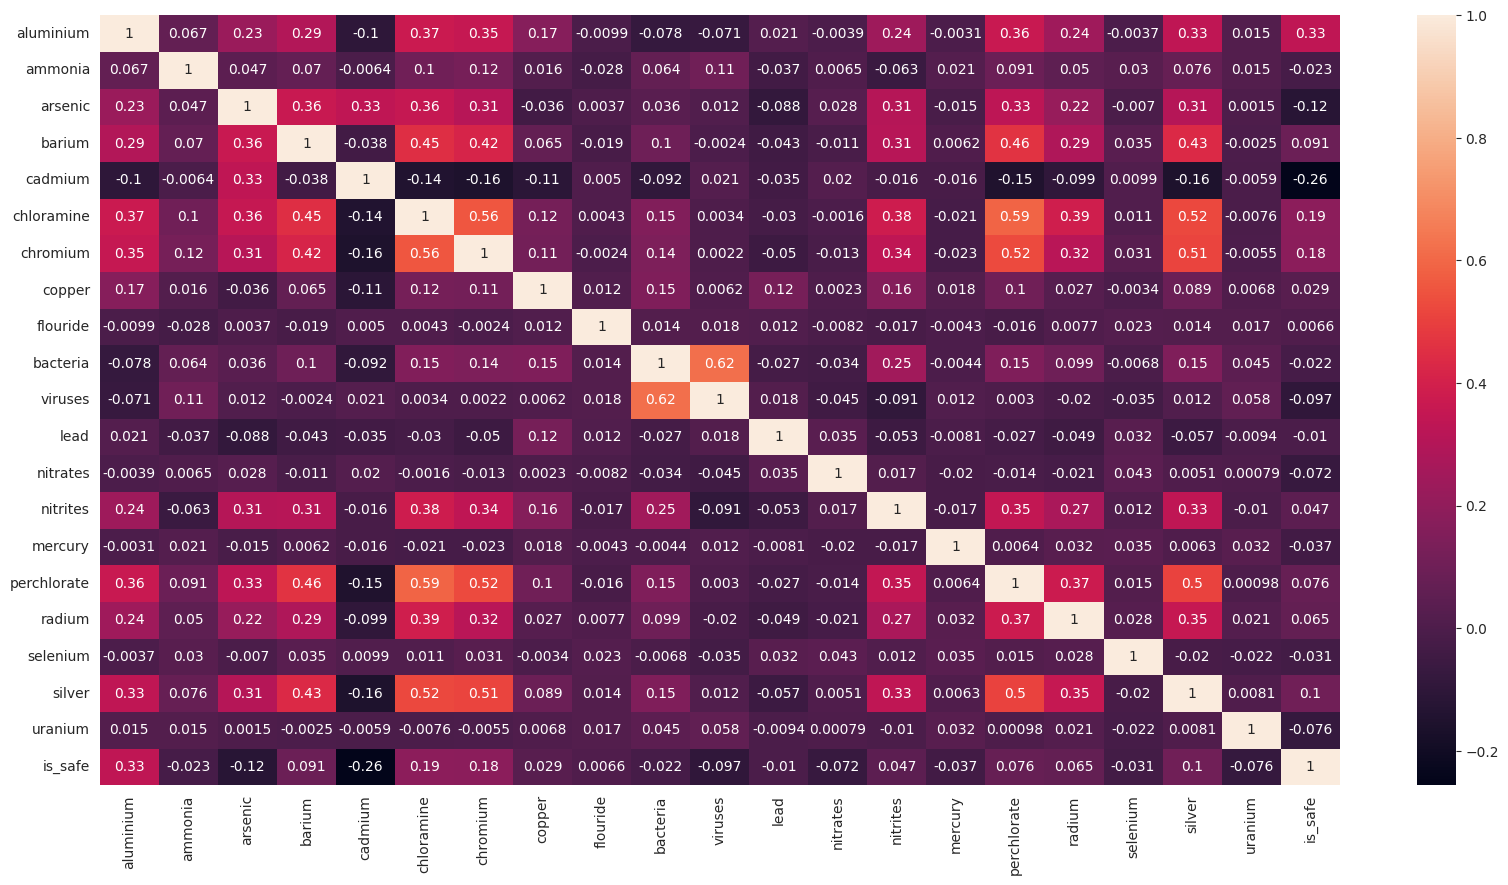

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
new_df = df[['perchlorate','chloramine','chromium','silver','barium']]

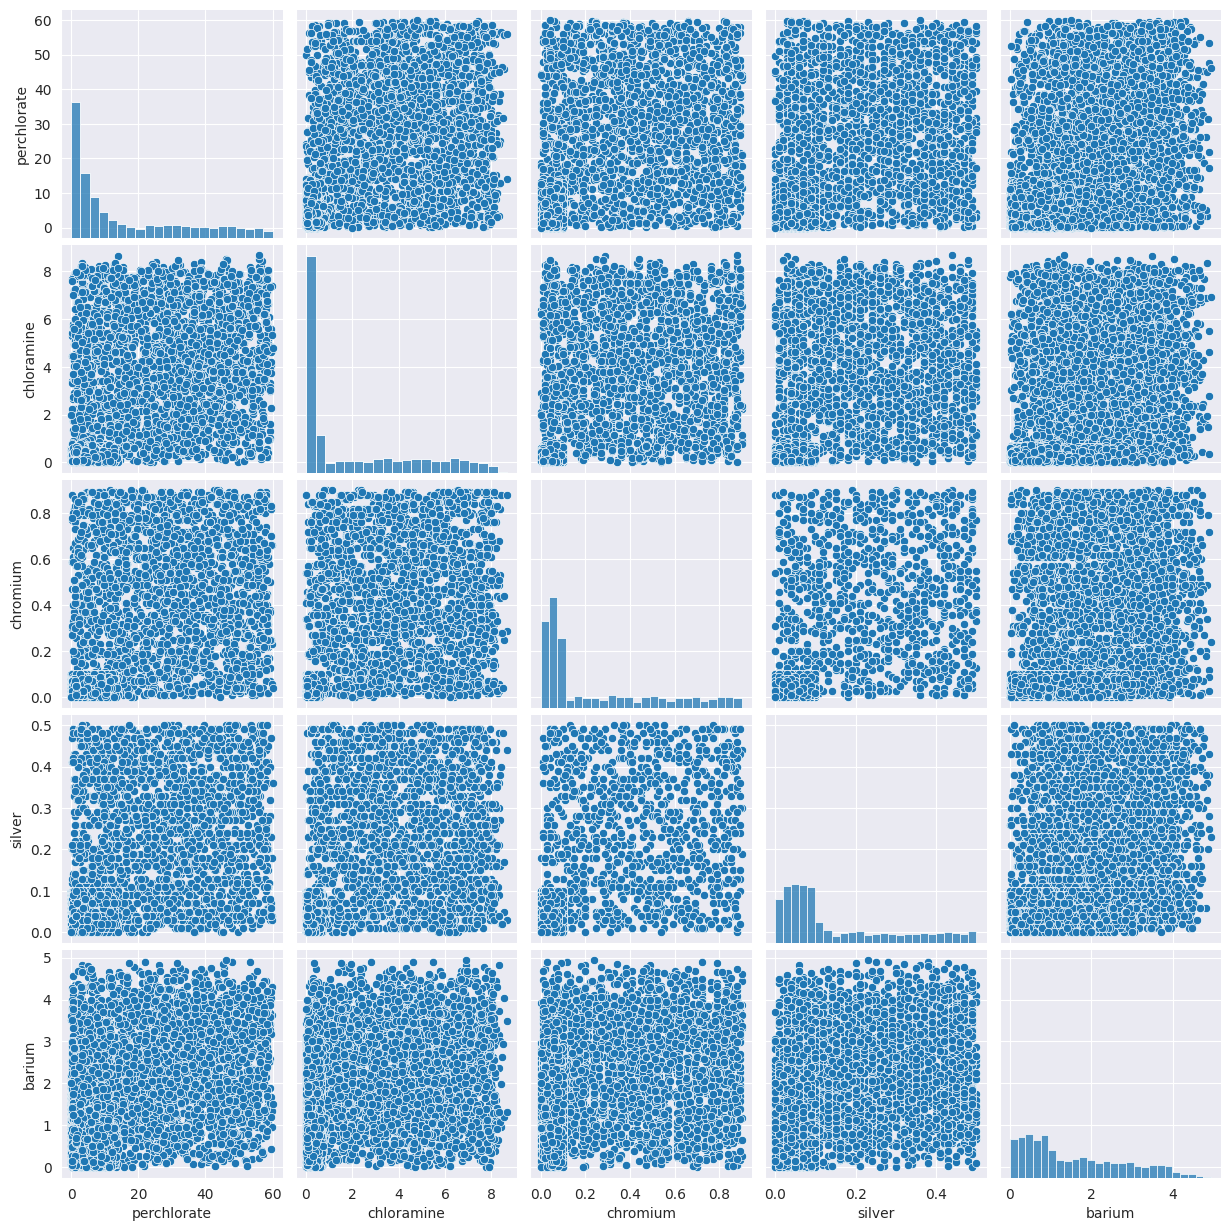

In [ ]:
sns.pairplot(new_df)

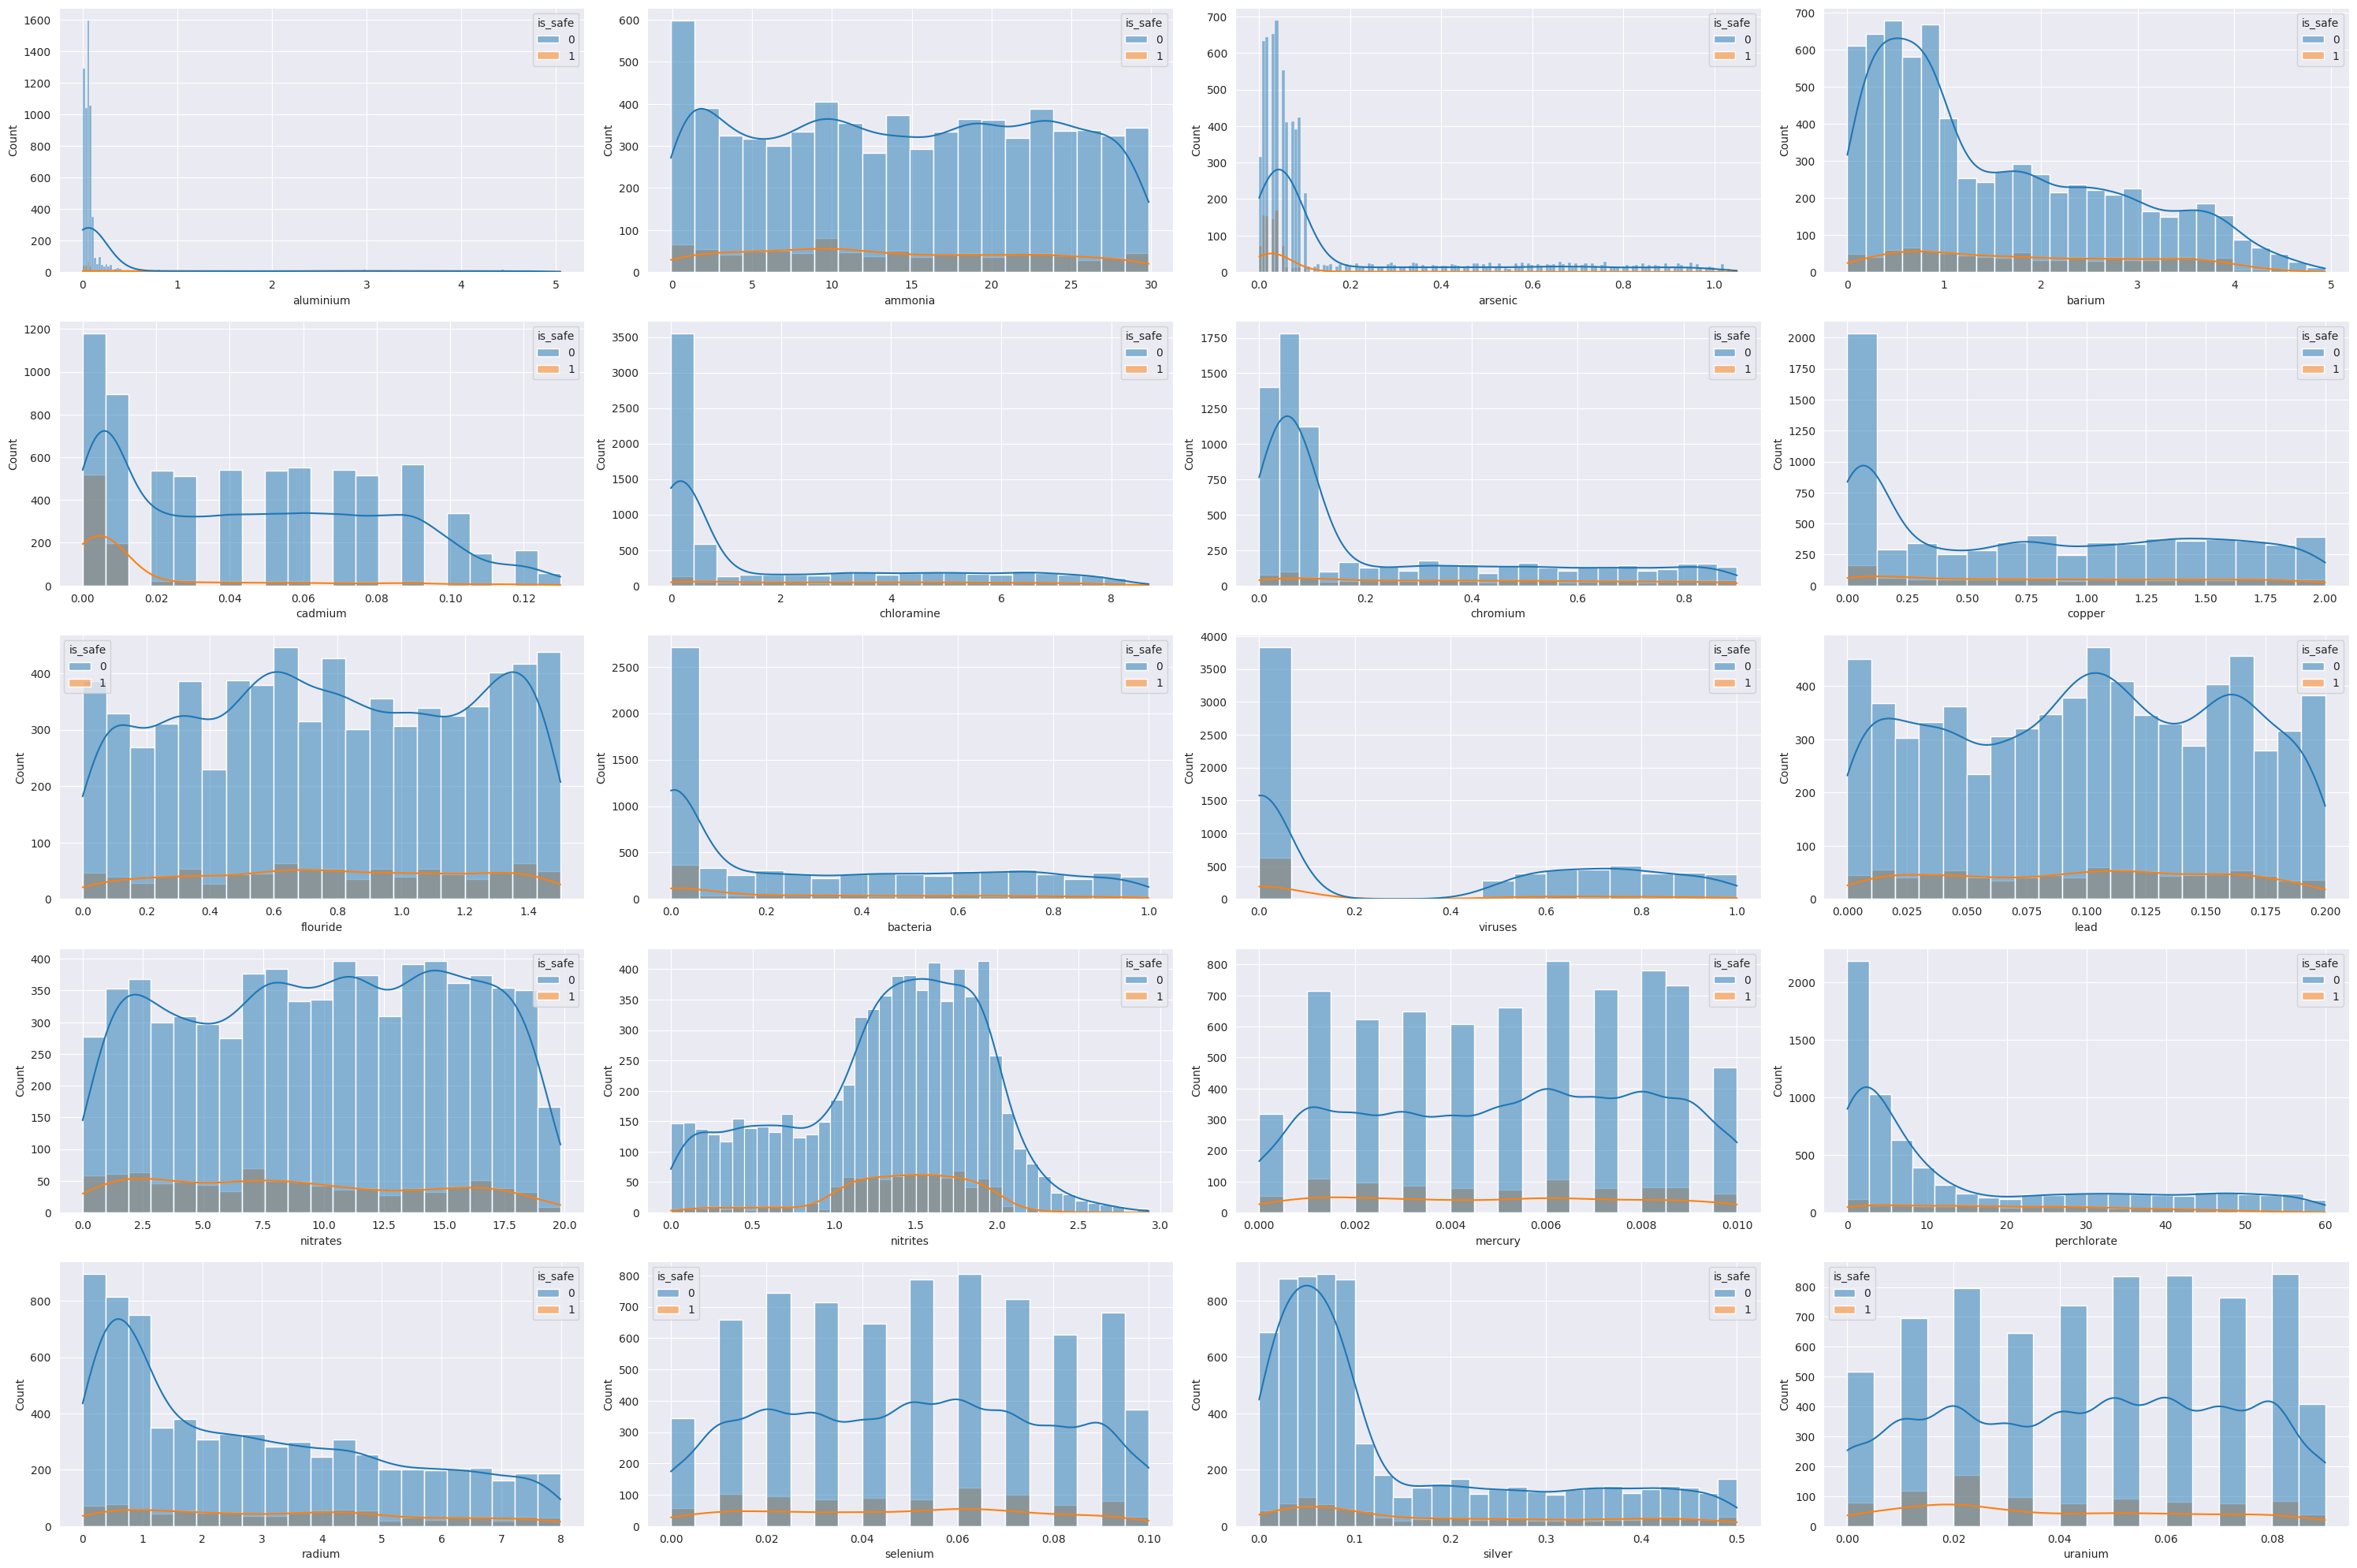

In [ ]:
plt.figure(figsize=(30,20))
j=1
for i,columns in enumerate(num_col):
    plt.subplot(5,4,j)
    sns.histplot(x=columns,data=df,kde=True,hue=target)
    j+=1
plt.tight_layout()

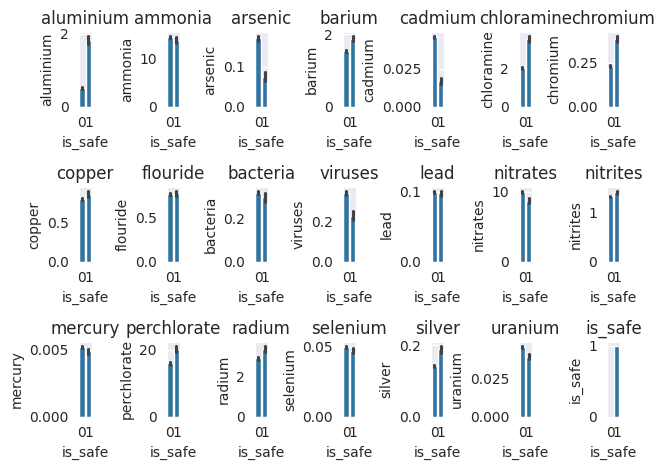

In [ ]:
r=3
c=7
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.barplot(y=df.loc[:,i],x='is_safe',data=df)
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

In [ ]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')

ms,ss=MinMaxScaler(),StandardScaler()

ct=ColumnTransformer([
    ('num_encoder',ss,make_column_selector(dtype_include='float64'))
],remainder='passthrough',verbose=True)

In [ ]:
X=df.drop([target],axis=1)
y=df[[target]]
X.head(1)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.2,0.0,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02


In [ ]:
y.head(1)

,is_safe
0,1


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [ ]:
X_train.shape,y_train.shape

((6396, 20), (6396, 1))

In [ ]:
X_test.shape,y_test.shape

((1600, 20), (1600, 1))

In [ ]:
X_test.head(2)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
1264,3.90,22.64,0.41,0.34,0.030,7.94,0.06,0.28,0.28,0.00,0.000,0.137,18.54,1.55,0.009,13.18,6.93,0.10,0.26,0.02
180,4.08,20.19,0.04,3.34,0.007,5.23,0.86,1.94,0.80,0.32,0.004,0.124,12.77,1.54,0.010,56.44,1.51,0.01,0.27,0.04


In [ ]:
y_test.head(2)

,is_safe
1264,0
180,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('is_safe', axis = 1),
                                                    df['is_safe'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [ ]:
model = XGBClassifier()

param_grid = {
    'n_estimators': randint(50, 251),
    'max_depth': randint(3, 15),
    'min_child_weight': randint(1, 11),
    'gamma': uniform(0.0, 1.0),
}

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

search = RandomizedSearchCV(model,
                            param_grid,
                            scoring = 'accuracy',
                            cv = kf,
                            n_iter = 100,
                            refit = True,
                            n_jobs = -1)

search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=Non...
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7acbf9d97490>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acbf9d94190>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acc020de140>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7acbff5532b0>},
                   scoring='accuracy')

In [ ]:
search.best_params_

{'gamma': 0.44137073152774653,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 154}

In [ ]:
search.best_score_

0.9710759137998437

In [ ]:
print(f'Train Score : {accuracy_score(y_train, search.predict(X_train))}')
print(f'Test Score : {accuracy_score(y_test, search.predict(X_test))}')

Train Score : 0.9984365228267668
Test Score : 0.968125


In [ ]:
confusion_matrix(y_test, search.predict(X_test))

array([[1407,   12],
       [  39,  142]])

In [ ]:
print(classification_report(y_test, search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1419
           1       0.92      0.78      0.85       181

    accuracy                           0.97      1600
   macro avg       0.95      0.89      0.91      1600
weighted avg       0.97      0.97      0.97      1600



In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'minipj.pkl')

NameError: name 'model' is not defined